In [1]:
from google.colab import files
file = files.upload()

Saving drug200.csv to drug200.csv


In [2]:
# AI Assignment 2 
# 20BCT0163 Rajarshi Saha

  #Build an ANN model for Drug classification.
  # This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information,
  # including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to
  # develop a model that can accurately predict the class or category of a given drug based on its features.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
# Task 1: Read the dataset and do data pre-processing

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder

In [198]:
data = pd.read_csv('drug200.csv')
df = pd.DataFrame(data)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [199]:
x = df.iloc[:,:-1]
y = pd.get_dummies(df.iloc[:,-1:])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
190,58,M,HIGH,HIGH,18.991
7,41,M,LOW,HIGH,11.037
26,31,M,HIGH,HIGH,30.366
138,51,M,HIGH,NORMAL,11.343
58,60,M,NORMAL,NORMAL,10.091
...,...,...,...,...,...
113,65,F,LOW,NORMAL,13.769
64,60,F,HIGH,HIGH,13.303
15,16,F,HIGH,NORMAL,15.516
125,19,F,HIGH,NORMAL,25.969


In [200]:
x_train = x_train.reset_index().iloc[:,1:]
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
0,58,M,HIGH,HIGH,18.991
1,41,M,LOW,HIGH,11.037
2,31,M,HIGH,HIGH,30.366
3,51,M,HIGH,NORMAL,11.343
4,60,M,NORMAL,NORMAL,10.091
...,...,...,...,...,...
155,65,F,LOW,NORMAL,13.769
156,60,F,HIGH,HIGH,13.303
157,16,F,HIGH,NORMAL,15.516
158,19,F,HIGH,NORMAL,25.969


In [201]:
y_train = y_train.reset_index().iloc[:,1:]
y_train

,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
155,0,0,0,0,1
156,0,0,1,0,0
157,1,0,0,0,0
158,1,0,0,0,0


In [202]:
from scipy import stats
z = np.abs(stats.zscore(x_train['Na_to_K']))
drop_idx = np.where(z>2)
drop_idx

(array([ 10,  44,  49,  54,  59,  71,  85,  99, 136]),)

In [203]:
x_train = x_train.drop(drop_idx[0]).reset_index()
x_train = x_train.iloc[:,1:]
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
0,58,M,HIGH,HIGH,18.991
1,41,M,LOW,HIGH,11.037
2,31,M,HIGH,HIGH,30.366
3,51,M,HIGH,NORMAL,11.343
4,60,M,NORMAL,NORMAL,10.091
...,...,...,...,...,...
146,65,F,LOW,NORMAL,13.769
147,60,F,HIGH,HIGH,13.303
148,16,F,HIGH,NORMAL,15.516
149,19,F,HIGH,NORMAL,25.969


In [204]:
y_train = y_train.drop(drop_idx[0]).reset_index()
y_train = y_train.iloc[:,1:]
y_train

,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
146,0,0,0,0,1
147,0,0,1,0,0
148,1,0,0,0,0
149,1,0,0,0,0


In [142]:
# vis_df = pd.DataFrame(np.array(pd.DataFrame([df['Age'],df['Na_to_K']])).reshape(-1,2), columns =['Age','Na_to_K'])
# vis_df

In [205]:
vis_df = x_train.drop(['Sex', 'BP', 'Cholesterol'],axis = 1)
vis_df

,Age,Na_to_K
0,58,18.991
1,41,11.037
2,31,30.366
3,51,11.343
4,60,10.091
...,...,...
146,65,13.769
147,60,13.303
148,16,15.516
149,19,25.969


<Axes: >

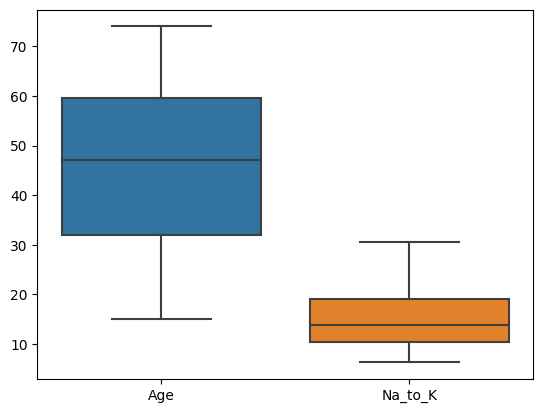

In [206]:
sb.boxplot(vis_df)

In [207]:
scaler = MinMaxScaler()
encoder = scaler.fit(vis_df)
scaled_df = pd.DataFrame(encoder.transform(vis_df),columns = ['Age','Na_to_K'])
scaled_df

,Age,Na_to_K
0,0.728814,0.523561
1,0.440678,0.196222
2,0.271186,0.991687
3,0.610169,0.208815
4,0.762712,0.157290
...,...,...
146,0.847458,0.308655
147,0.762712,0.289477
148,0.016949,0.380551
149,0.067797,0.810733


<Axes: >

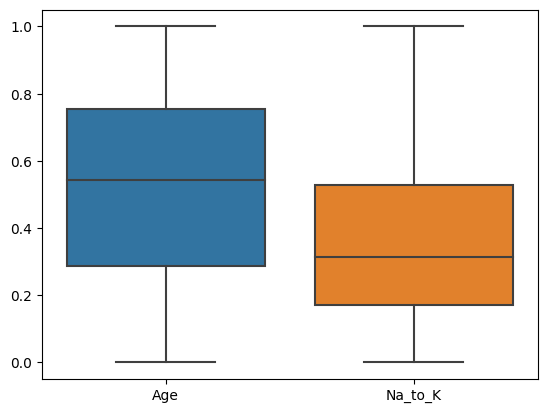

In [208]:
sb.boxplot(scaled_df)

In [209]:
pp_df = x_train
pp_df['Age'] = scaled_df['Age']
pp_df['Na_to_K'] = scaled_df['Na_to_K']
pp_df

,Age,Sex,BP,Cholesterol,Na_to_K
0,0.728814,M,HIGH,HIGH,0.523561
1,0.440678,M,LOW,HIGH,0.196222
2,0.271186,M,HIGH,HIGH,0.991687
3,0.610169,M,HIGH,NORMAL,0.208815
4,0.762712,M,NORMAL,NORMAL,0.157290
...,...,...,...,...,...
146,0.847458,F,LOW,NORMAL,0.308655
147,0.762712,F,HIGH,HIGH,0.289477
148,0.016949,F,HIGH,NORMAL,0.380551
149,0.067797,F,HIGH,NORMAL,0.810733


In [210]:
x_test.head()

,Age,Sex,BP,Cholesterol,Na_to_K
59,34,M,HIGH,HIGH,18.703
5,22,F,NORMAL,HIGH,8.607
20,57,M,LOW,NORMAL,19.128
198,23,M,NORMAL,NORMAL,14.020
52,62,M,LOW,NORMAL,27.183


In [211]:
le = LabelEncoder()
for i in range(1,4):
  pp_df[pp_df.columns[i]] = le.fit_transform(pp_df[pp_df.columns[i]])
  x_test[x_test.columns[i]] = le.transform(x_test[x_test.columns[i]])
pp_df


,Age,Sex,BP,Cholesterol,Na_to_K
0,0.728814,1,0,0,0.523561
1,0.440678,1,1,0,0.196222
2,0.271186,1,0,0,0.991687
3,0.610169,1,0,1,0.208815
4,0.762712,1,2,1,0.157290
...,...,...,...,...,...
146,0.847458,0,1,1,0.308655
147,0.762712,0,0,0,0.289477
148,0.016949,0,0,1,0.380551
149,0.067797,0,0,1,0.810733


In [212]:
x_test_scaled = x_test.drop(['Sex', 'BP', 'Cholesterol'],axis = 1)
x_test_scaled = pd.DataFrame(encoder.transform(x_test_scaled),columns = ['Age','Na_to_K'])
x_test_scaled.head()

,Age,Na_to_K
0,0.322034,0.511708
1,0.118644,0.096218
2,0.711864,0.529199
3,0.135593,0.318984
4,0.796610,0.860694


In [213]:
x_test = x_test.reset_index().iloc[:,1:]
x_test['Age'] = x_test_scaled['Age']
x_test['Na_to_K'] = x_test_scaled['Na_to_K']
x_test.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,0.322034,1,0,0,0.511708
1,0.118644,0,2,0,0.096218
2,0.711864,1,1,1,0.529199
3,0.135593,1,2,1,0.318984
4,0.796610,1,1,1,0.860694


In [214]:
y_test = y_test.reset_index().iloc[:,1:]
y_test.head()

,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,1,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0


In [215]:
x_train = pp_df
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
0,0.728814,1,0,0,0.523561
1,0.440678,1,1,0,0.196222
2,0.271186,1,0,0,0.991687
3,0.610169,1,0,1,0.208815
4,0.762712,1,2,1,0.157290
...,...,...,...,...,...
146,0.847458,0,1,1,0.308655
147,0.762712,0,0,0,0.289477
148,0.016949,0,0,1,0.380551
149,0.067797,0,0,1,0.810733


In [ ]:
# Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)

In [216]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [226]:

model = Sequential()

model.add(Dense(4, input_shape = (5,), activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(32,activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(5,activation='softmax'))


In [227]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
     

In [ ]:
# Task 3: Test the model with random data

In [166]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
0,0.728814,1,0,0,0.523561
1,0.440678,1,1,0,0.196222
2,0.271186,1,0,0,0.991687
3,0.610169,1,0,1,0.208815
4,0.762712,1,2,1,0.157290
...,...,...,...,...,...
146,0.847458,0,1,1,0.308655
147,0.762712,0,0,0,0.289477
148,0.016949,0,0,1,0.380551
149,0.067797,0,0,1,0.810733


In [222]:
y_train

,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
146,0,0,0,0,1
147,0,0,1,0,0
148,1,0,0,0,0
149,1,0,0,0,0


In [228]:
model.fit(x_train, y_train, epochs=80, batch_size=10)

Epoch 1/80
16/16 [==============================] - 1s 4ms/step - loss: 1.5066 - accuracy: 0.5033
Epoch 2/80
16/16 [==============================] - 0s 3ms/step - loss: 1.3295 - accuracy: 0.5364
Epoch 3/80
16/16 [==============================] - 0s 3ms/step - loss: 1.2037 - accuracy: 0.4901
Epoch 4/80
16/16 [==============================] - 0s 3ms/step - loss: 1.1290 - accuracy: 0.5364
Epoch 5/80
16/16 [==============================] - 0s 3ms/step - loss: 1.0478 - accuracy: 0.5166
Epoch 6/80
16/16 [==============================] - 0s 3ms/step - loss: 0.9643 - accuracy: 0.5629
Epoch 7/80
16/16 [==============================] - 0s 3ms/step - loss: 0.9088 - accuracy: 0.6026
Epoch 8/80
16/16 [==============================] - 0s 3ms/step - loss: 0.8410 - accuracy: 0.6490
Epoch 9/80
16/16 [==============================] - 0s 3ms/step - loss: 0.8117 - accuracy: 0.6424
Epoch 10/80
16/16 [==============================] - 0s 2ms/step - loss: 0.7664 - accuracy: 0.6887
Epoch 11/80
16/16 [

In [230]:
y_test

,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,1,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0
5,1,0,0,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,1,0,0,0,0
9,0,0,0,1,0


In [233]:
y_pred

array([[9.99961436e-01, 3.35303048e-05, 6.51247774e-07, 4.16890180e-06,
        2.62388170e-07],
       [2.10563274e-04, 3.57658081e-07, 5.87700379e-06, 5.27433343e-02,
        9.47039783e-01],
       [9.97914314e-01, 1.23692293e-10, 1.77382997e-09, 1.45133366e-04,
        1.94066146e-03],
       [4.29248018e-03, 2.98099913e-11, 1.94956478e-08, 1.42643775e-03,
        9.94281054e-01],
       [9.99999940e-01, 2.93006188e-15, 5.69235575e-15, 7.37662997e-09,
        2.94305558e-08],
       [9.99999940e-01, 3.80335902e-10, 1.03695776e-11, 6.47127774e-09,
        1.63384384e-09],
       [1.64163637e-03, 2.08017579e-11, 1.52524215e-08, 1.18104811e-03,
        9.97177243e-01],
       [3.50389212e-01, 9.42918006e-04, 1.98163310e-04, 4.97425556e-01,
        1.51044175e-01],
       [9.99999821e-01, 6.40860831e-09, 7.56132518e-11, 1.07693765e-07,
        1.99411510e-08],
       [2.22716015e-03, 1.39750389e-03, 1.04978948e-03, 6.38345659e-01,
        3.56979847e-01],
       [9.99999940e-01, 2.3030

In [234]:
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test.values, axis = 1)
y_pred_class = np.argmax(y_pred, axis = 1)

2/2 [==============================] - 0s 11ms/step


In [239]:
Result_df = pd.DataFrame()
Result_df['Actual'] = list(y_test_class.reshape(-1,1))
Result_df['Predicted'] = list(y_pred_class.reshape(-1,1))
Result_df

,Actual,Predicted
0,[0],[0]
1,[4],[4]
2,[0],[0]
3,[4],[4]
4,[0],[0]
5,[0],[0]
6,[4],[4]
7,[3],[3]
8,[0],[0]
9,[3],[3]


In [242]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.86      1.00      0.92         6
           2       1.00      0.67      0.80         3
           3       1.00      0.67      0.80         6
           4       0.75      1.00      0.86         9

    accuracy                           0.90        40
   macro avg       0.92      0.85      0.87        40
weighted avg       0.92      0.90      0.90        40



In [243]:
print(confusion_matrix(y_test_class,y_pred_class))

[[15  0  0  0  1]
 [ 0  6  0  0  0]
 [ 0  1  2  0  0]
 [ 0  0  0  4  2]
 [ 0  0  0  0  9]]
